# Different metrics (error functions & quality functional)

In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(19)

# Regression task

In [134]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, r2_score

In [143]:
# models for comparison
linear_model = LinearRegression()

cols=['noise', 'MAE', 'MSE', 'MAPE', 'R2_score']
metrics = pd.DataFrame(columns=cols)
metrics

,noise,MAE,MSE,MAPE,R2_score


In [144]:
for noise in np.arange(0.1, 5, 0.1):
    # data
    x, y = make_regression(n_samples=10000, n_features=100, noise=noise)
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # training
    linear_model.fit(x_train, y_train)

    # predict
    predicted_linear = linear_model.predict(x_test)

    # score
    linear_scores = pd.DataFrame([[noise,
                                  mean_absolute_error(predicted_linear, y_test),
                                  mean_squared_error(predicted_linear, y_test),
                                  mean_absolute_percentage_error(predicted_linear, y_test),
                                  r2_score(predicted_linear, y_test)]],
                                  columns=cols)
    metrics = pd.concat([metrics, linear_scores])

    # plt.scatter(x_test, y_test)
    # plt.plot(x_test, predicted_forest, c='r')
    # plt.plot(x_test, predicted_linear, c='g')
    # plt.title(f'regression task with noise {noise}')
    # plt.show()

In [145]:
metrics = metrics.set_index('noise')
metrics

,MAE,MSE,MAPE,R2_score
noise,,,,
0.1,0.079038,0.009836,0.001768,1.000000
0.2,0.164029,0.042489,0.006944,0.999998
0.3,0.240411,0.090220,0.018314,0.999992
0.4,0.319757,0.159371,0.012033,0.999996
0.5,0.388526,0.240692,0.013526,0.999992
0.6,0.480527,0.364325,0.015473,0.999988
0.7,0.568412,0.513018,0.036895,0.999985
0.8,0.641632,0.638329,0.026356,0.999988
0.9,0.700094,0.777227,0.034440,0.999984


Text(0.5, 1.0, 'ERRORS vs NOISE LEVEL')

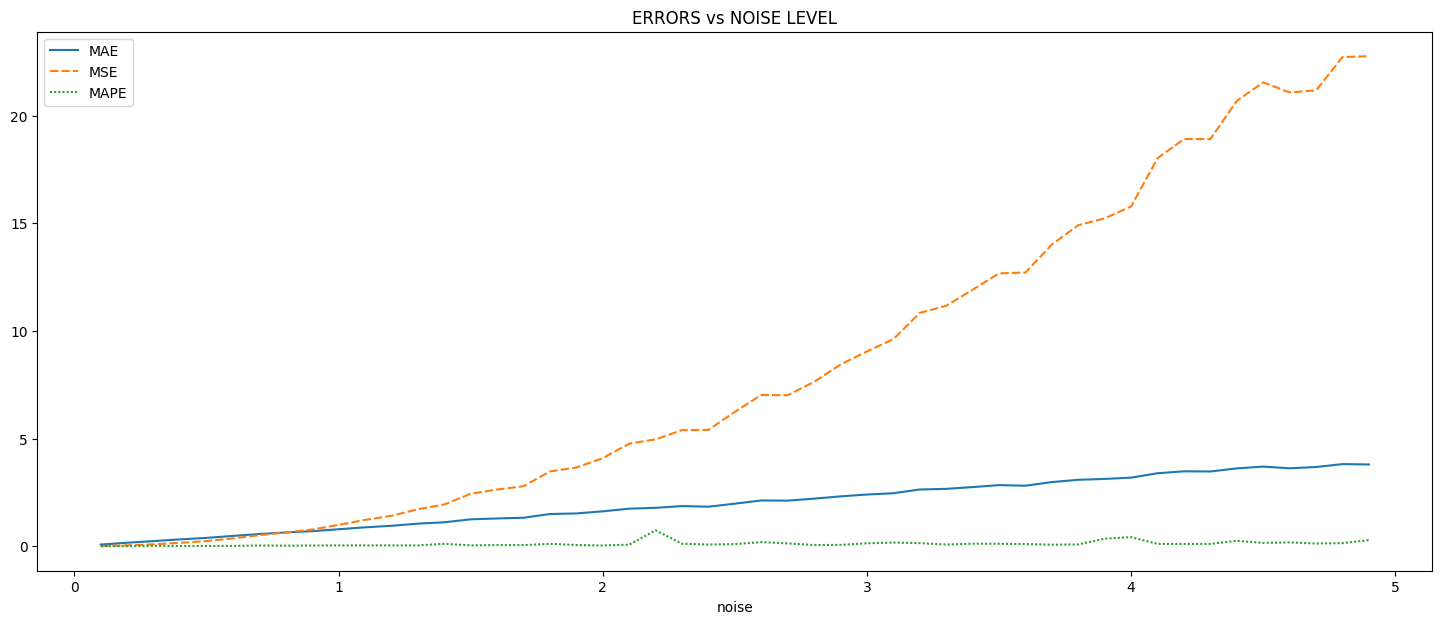

In [146]:
plt.figure(figsize=(18, 7))
sns.lineplot(data=metrics[['MAE', 'MSE', 'MAPE']])
plt.title('ERRORS vs NOISE LEVEL')

<AxesSubplot: xlabel='noise', ylabel='R2_score'>

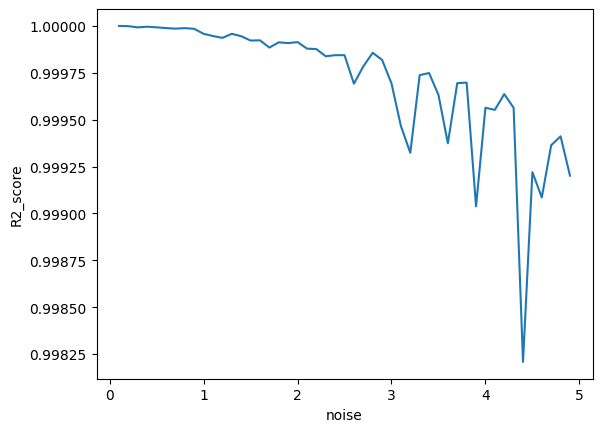

In [147]:
sns.lineplot(data=metrics['R2_score'])